In [1]:
import numpy as np # Importação necessária para as demais questões


def newton(f,f_,x):
  x = x - f(x)/f_(x)
  return x

In [2]:

def lista_5_ex_2 (p):
    t=0
    for i in range(1000):

        if abs(75*np.power(np.e,((-1.5)*t)) + 20*np.power(np.e,(-0.075*t))-(p*95))<10e-16:return t
        if(-112.5*np.e**(-1.5*t)-1.5*np.e**(-0.075*t))==0:break

        t-=(75*np.power(np.e,((-1.5)*t)) + 20*np.power(np.e,(-0.075*t))-(p*95))/(-112.5*np.e**(-1.5*t)-1.5*np.e**(-0.075*t))

    return t





In [ ]:
def f(M, c, v, t):
    return (9.81*M/c) * (1 - np.e**(-t*c/M)) - v

def df(M,c,t):
    exp = -c*t/M
    return (9.81/c)* (1 - np.e**exp - (c*t*np.e**exp)/M)

def lista_5_ex_3 (c,v,t):
    if c == 0:
        return "Error, divisão por 0"
    M = 50
    Chute  = 100
    while abs(M - Chute) > 2**-30:
    
        Chute = M
        M = M - (f(M,c,v,t)/df(M,c,t))

    return M

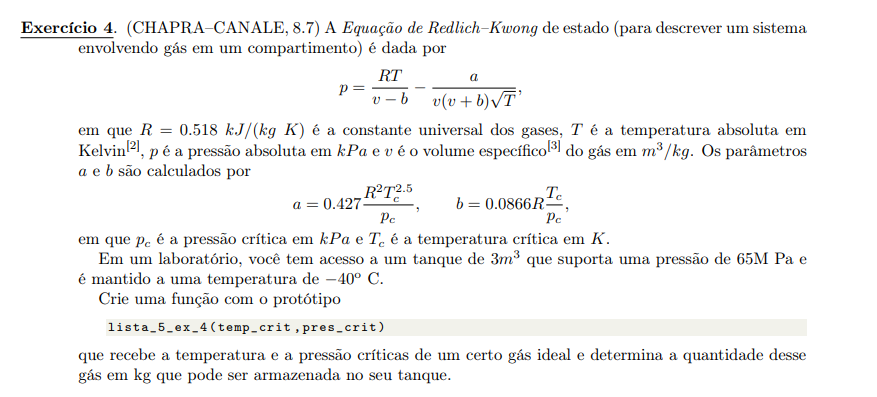

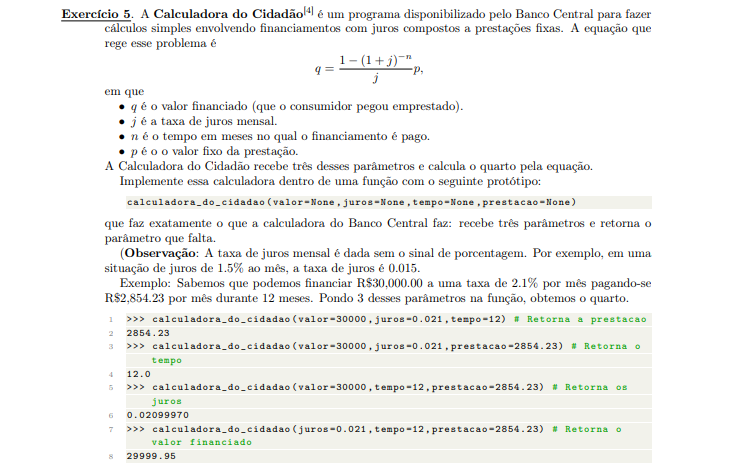
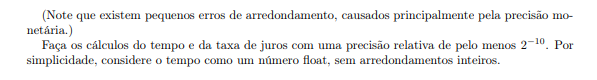

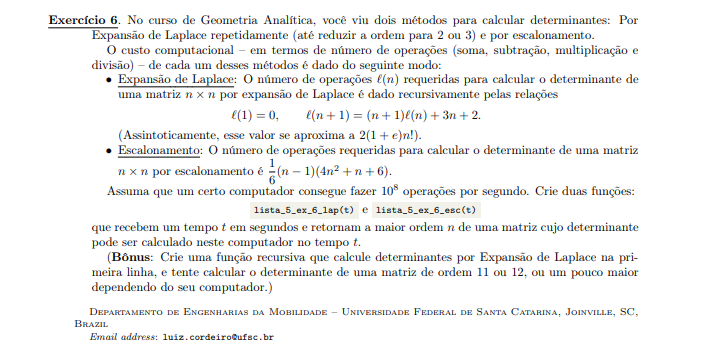